<a href="https://colab.research.google.com/github/Kaushal2001-coder/Brain_Tumor_images/blob/main/Btmodel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install umap-learn[plot]
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import math
import cv2
import matplotlib.pyplot as plt
import os
import seaborn as sns
import umap
from PIL import Image
from scipy import misc
from os import listdir
from os.path import isfile, join
import numpy as np
from scipy import misc
from random import shuffle
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.utils.np_utils import to_categorical

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 KB 3.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 20.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 66.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.5/76.5 KB 10.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pynndescent: filename=pynndescent-0.5.8-py3-none-any.whl size=55513 sha256=22c6287fe78088b3272efda5ce95b74f94ef0fa17800129bffd956509c08f5e1
  Stored in directory: /root/.cache/pip/wheels/1c/63/3a/29954bca1a27ba100ed8c27973a78cb71b43dc67aed62e80c3
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82829 sha256=8c30d6f3da7dec2c4ae9838dfe61cee917475f71881789ed97bd169ccb129ce4
  Stored in directory: /root/.ca

In [3]:
os.listdir('/dataset')

['.ipynb_checkpoints', 'no', 'yes']

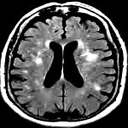

In [4]:
im =Image.open('/dataset/no/no1.jpg').resize((128,128))
im

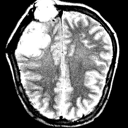

In [6]:
im =Image.open('/dataset/yes/y1.jpg').resize((128,128))
im

In [7]:
yes=os.listdir('/dataset/yes')
no=os.listdir('/dataset/no')

In [8]:
data=np.concatenate([yes,no])
len(data)==len(yes)+len(no)

True

In [9]:
target_x=np.full(len(yes),1)
target_y=np.full(len(no),0)
data_target=np.concatenate([target_x,target_y])
len(data_target)==len(target_x)+len(target_y)

True

In [10]:
len(data_target)==len(data)

True

In [11]:
data_target

array([1, 1, 1, ..., 0, 0, 0])

In [12]:
data

array(['y1185.jpg', 'y1045.jpg', 'y1244.jpg', ..., 'no252.jpg',
       'no583.jpg', 'no349.jpg'], dtype='<U10')

In [13]:
yes_values=os.listdir('/dataset/yes')
no_values=os.listdir('/dataset/no')

In [14]:
X_data =[]
for file in yes_values:
    #face = misc.imread('../input/brain_tumor_dataset/yes/'+file)
    img = cv2.imread('/dataset/yes/'+file)
    face = cv2.resize(img, (32, 32) )
    (b, g, r)=cv2.split(face) 
    img=cv2.merge([r,g,b])
    X_data.append(img)

In [15]:
for file in no_values:
    #face = misc.imread('../input/brain_tumor_dataset/yes/'+file)
    img = cv2.imread('/dataset/no/'+file)
    face = cv2.resize(img, (32, 32) )
    (b, g, r)=cv2.split(face) 
    img=cv2.merge([r,g,b])
    X_data.append(img)

In [16]:
len(X_data)==len(data)==len(data_target)

True

In [17]:
X = np.squeeze(X_data)

In [18]:
X.shape

(2721, 32, 32, 3)

In [19]:
X = X.astype('float32')
X /= 255

In [20]:
data_target

array([1, 1, 1, ..., 0, 0, 0])

In [21]:
(x_train, y_train), (x_test, y_test) = (X[:2177],data_target[:2177]) , (X[272:] , data_target[272:])
(x_valid , y_valid) = (x_test[:272], y_test[:272])

In [22]:
model = tf.keras.Sequential()

# Must define the input shape in the first layer of the neural network
model.add(tf.keras.layers.Conv2D(filters=16,kernel_size=9, padding='same', activation='relu', input_shape=(32,32,3))) 
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.45))

model.add(tf.keras.layers.Conv2D(filters=16,kernel_size=9,padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.25))

model.add(tf.keras.layers.Conv2D(filters=36, kernel_size=9, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.25))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.Dropout(0.15))


model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

# Take a look at the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 16)        3904      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 16)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 16, 16, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 16)        20752     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 16)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 8, 8, 16)          0

In [23]:
model.compile(loss='binary_crossentropy',
             optimizer=tf.keras.optimizers.Adam(),
             metrics=['acc'])

In [24]:
model.fit(x_train,
         y_train,
         batch_size=128,
         epochs=150,
         validation_data=(x_valid, y_valid),)

Epoch 1/150
18/18 [==============================] - 13s 650ms/step - loss: 0.7073 - acc: 0.6100 - val_loss: 0.5480 - val_acc: 1.0000
Epoch 2/150
18/18 [==============================] - 11s 626ms/step - loss: 0.6429 - acc: 0.6279 - val_loss: 0.5121 - val_acc: 1.0000
Epoch 3/150
18/18 [==============================] - 10s 573ms/step - loss: 0.6241 - acc: 0.6279 - val_loss: 0.5510 - val_acc: 1.0000
Epoch 4/150
18/18 [==============================] - 11s 583ms/step - loss: 0.6238 - acc: 0.6527 - val_loss: 0.5496 - val_acc: 1.0000
Epoch 5/150
18/18 [==============================] - 11s 632ms/step - loss: 0.5894 - acc: 0.7102 - val_loss: 0.2325 - val_acc: 0.9963
Epoch 6/150
18/18 [==============================] - 11s 629ms/step - loss: 0.5768 - acc: 0.7037 - val_loss: 0.3639 - val_acc: 0.9632
Epoch 7/150
18/18 [==============================] - 11s 627ms/step - loss: 0.5174 - acc: 0.7570 - val_loss: 0.4051 - val_acc: 0.9301
Epoch 8/150
18/18 [==============================] - 11s 629ms

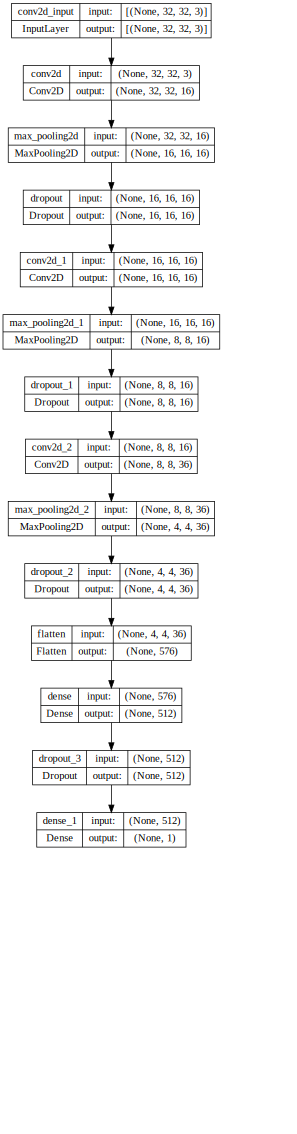

In [25]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
SVG(model_to_dot(model,show_shapes = True).create(prog='dot', format='svg'))

In [26]:
# Evaluate the model on test set
score = model.evaluate(x_test, y_test, verbose=0)

# Print test accuracy
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.9893833994865417


In [27]:
labels =["Yes",  # index 0
        "No",      # index 1
        ]

77/77 [==============================] - 8s 95ms/step


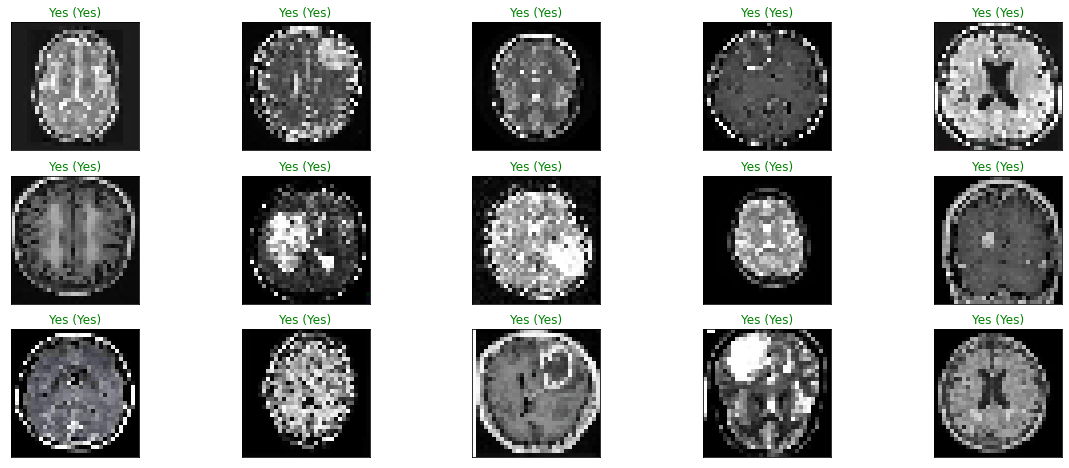

In [28]:
y_hat = model.predict(x_test)

# Plot a random sample of 10 test images, their predicted labels and ground truth
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(x_test.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(x_test[index]))
    predict_index = np.argmax(y_hat[index])
    true_index = np.argmax(y_test[index])
    # Set the title for each image
    ax.set_title("{} ({})".format(labels[predict_index], 
                                  labels[true_index]),
                                  color=("green" if predict_index == true_index else "red"))
plt.show()

In [29]:
import pickle

In [31]:
pickle.dump(model, open('/model/model_saved', 'wb'))

Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers
......conv2d
.........vars
............0
............1
......conv2d_1
.........vars
............0
............1
......conv2d_2
.........vars
............0
............1
......dense
.........vars
............0
............1
......dense_1
.........vars
............0
............1
......dropout
.........vars
......dropout_1
.........vars
......dropout_2
.........vars
......dropout_3
.........vars
......flatten
.........vars
......max_pooling2d
.........vars
......max_pooling2d_1
.........vars
......max_pooling2d_2
.........vars
...metrics
......mean
.........vars
............0
............1
......mean_metric_wrapper
.........vars
............0
............1
...optimizer
......vars
.........0
.........1
.........10
.........11
.........12
.........13
.........14
.........15
.........16
.........17
.........18
.........19
.........2
.........20
.........3
.........4
.........5
.........6
.........7
.........8
......

In [32]:
model_loaded = pickle.load(open('/model/model_saved','rb'))


Keras model archive loading:
File Name                                             Modified             Size
metadata.json                                  2023-02-23 07:25:52           64
config.json                                    2023-02-23 07:25:52         4832
variables.h5                                   2023-02-23 07:25:52      4454968
Keras weights file (<HDF5 file "variables.h5" (mode r)>) loading:
...layers
......conv2d
.........vars
............0
............1
......conv2d_1
.........vars
............0
............1
......conv2d_2
.........vars
............0
............1
......dense
.........vars
............0
............1
......dense_1
.........vars
............0
............1
......dropout
.........vars
......dropout_1
.........vars
......dropout_2
.........vars
......dropout_3
.........vars
......flatten
.........vars
......max_pooling2d
.........vars
......max_pooling2d_1
.........vars
......max_pooling2d_2
.........vars
...metrics
......mean
.........vars
........

In [35]:
model_loaded.predict(x_test)

77/77 [==============================] - 3s 38ms/step


array([[9.9590993e-01],
       [9.9190021e-01],
       [9.9493545e-01],
       ...,
       [1.5516943e-04],
       [1.9368058e-02],
       [2.6842546e-09]], dtype=float32)